In [1]:
#加载必要的库
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys,os,caffe
#设置当前目录
caffe_root = '/home/Shengping/caffe/' 
sys.path.insert(0, caffe_root + 'python')
os.chdir(caffe_root)

In [2]:
# set the solver prototxt
caffe.set_device(0)
caffe.set_mode_gpu()
solver = caffe.SGDSolver('examples/cifar10/cifar10_quick_solver.prototxt')

如果不需要绘制曲线，只需要训练出一个caffemodel, 直接调用solver.solve()就可以了。如果要绘制曲线，就需要把迭代过程中的值
保存下来，因此不能直接调用solver.solve(), 需要迭代。在迭代过程中，每迭代200次测试一次

In [3]:
%%time
niter =4000
test_interval = 200
train_loss = np.zeros(niter)
test_acc = np.zeros(int(np.ceil(niter / test_interval)))

# the main solver loop
for it in range(niter):
    solver.step(1)  # SGD by Caffe
    
    # store the train loss
    train_loss[it] = solver.net.blobs['loss'].data
    solver.test_nets[0].forward(start='conv1')
    
    if it % test_interval == 0:
        acc=solver.test_nets[0].blobs['accuracy'].data
        print 'Iteration', it, 'testing...','accuracy:',acc
        test_acc[it / test_interval] = acc

Iteration 0 testing... accuracy: 0.140000000596
Iteration 200 testing... accuracy: 0.439999997616
Iteration 400 testing... accuracy: 0.439999997616
Iteration 600 testing... accuracy: 0.560000002384
Iteration 800 testing... accuracy: 0.600000023842
Iteration 1000 testing... accuracy: 0.649999976158
Iteration 1200 testing... accuracy: 0.670000016689
Iteration 1400 testing... accuracy: 0.709999978542
Iteration 1600 testing... accuracy: 0.670000016689
Iteration 1800 testing... accuracy: 0.689999997616
Iteration 2000 testing... accuracy: 0.72000002861
Iteration 2200 testing... accuracy: 0.699999988079
Iteration 2400 testing... accuracy: 0.72000002861
Iteration 2600 testing... accuracy: 0.759999990463
Iteration 2800 testing... accuracy: 0.730000019073
Iteration 3000 testing... accuracy: 0.75
Iteration 3200 testing... accuracy: 0.75
Iteration 3400 testing... accuracy: 0.72000002861
Iteration 3600 testing... accuracy: 0.75
Iteration 3800 testing... accuracy: 0.759999990463
CPU times: user 46.6

绘制train过程中的loss曲线，和测试过程中的accuracy曲线。

[ 0.14        0.44        0.44        0.56        0.60000002  0.64999998
  0.67000002  0.70999998  0.67000002  0.69        0.72000003  0.69999999
  0.72000003  0.75999999  0.73000002  0.75        0.75        0.72000003
  0.75        0.75999999]


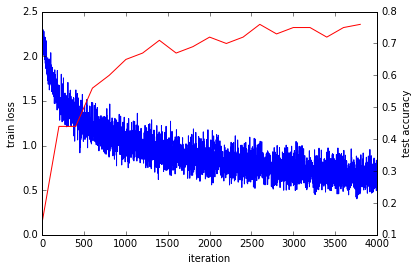

In [4]:
print test_acc
_, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(np.arange(niter), train_loss)
ax2.plot(test_interval * np.arange(len(test_acc)), test_acc, 'r')
ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')
ax2.set_ylabel('test accuracy')